In [1]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# The special thing about time series is that data points relate to one another...they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. For example, we can 'difference' a time series

In [4]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'H', periods = 20))
ts_lagged = ts.shift(5)

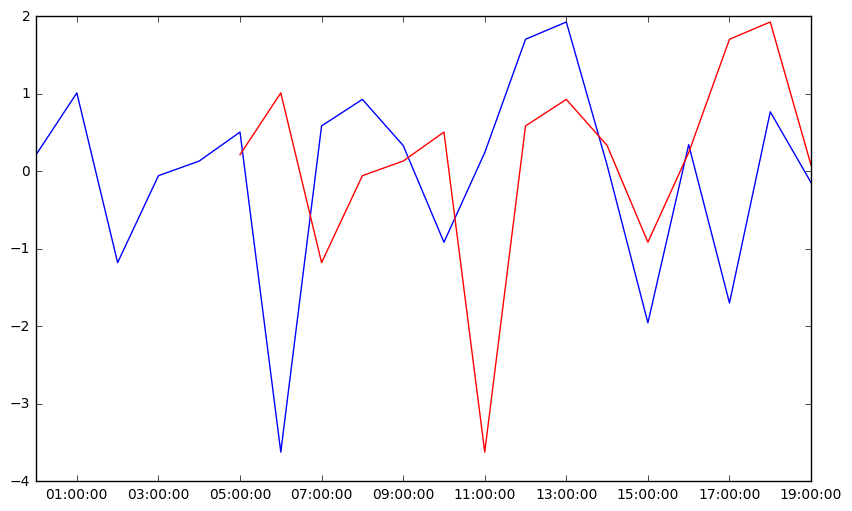

In [5]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

### Query: how can I shift my time series 'into the future' instead of into the past?

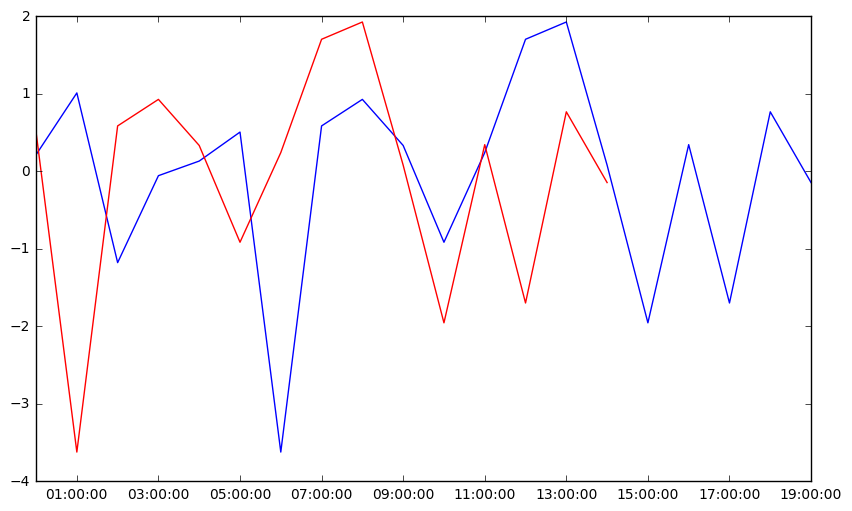

In [6]:
# %load snippets/shift_future.py
ts_lagged = ts.shift(-5)
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

# Window functions give you moving aggregate measures of a time series

In [7]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample()

In [10]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])

In [18]:
df.head()

,A,B,C
2016-05-01,-0.346323,0.561468,0.411105
2016-05-02,-0.829073,0.153567,0.077649
2016-05-03,-0.071638,-0.335241,1.290339
2016-05-04,0.358862,-0.723095,0.620053
2016-05-05,-0.903949,-0.063180,-0.156829


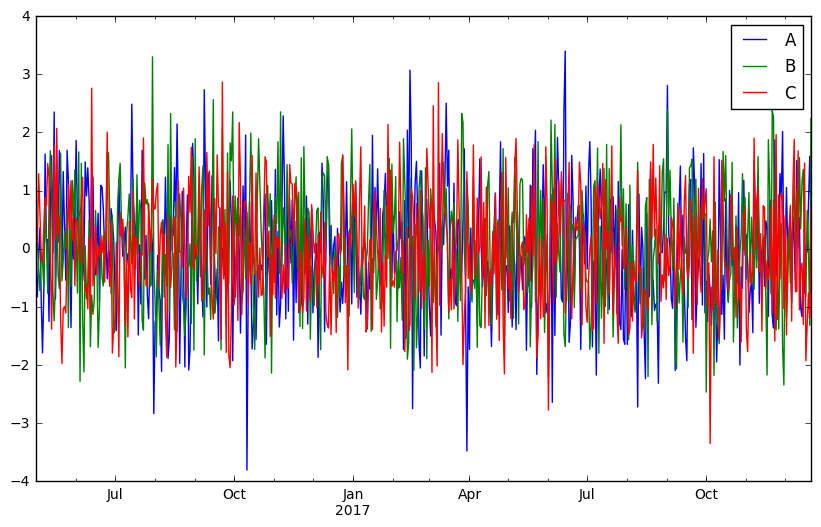

In [19]:
df.plot()

In [12]:
r = df.rolling(window = 20)
r

Rolling [window=20,center=False,axis=0]

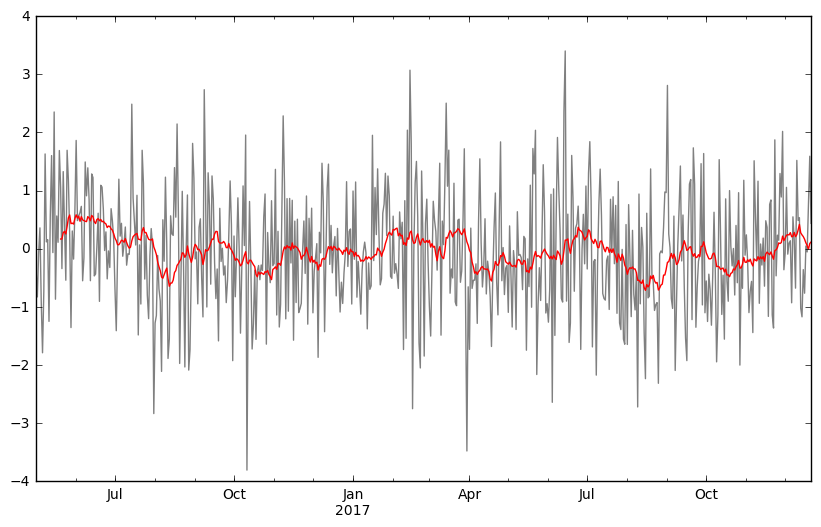

In [13]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, 
r.aggregate, r.std, r.skew, r.sum, r.var

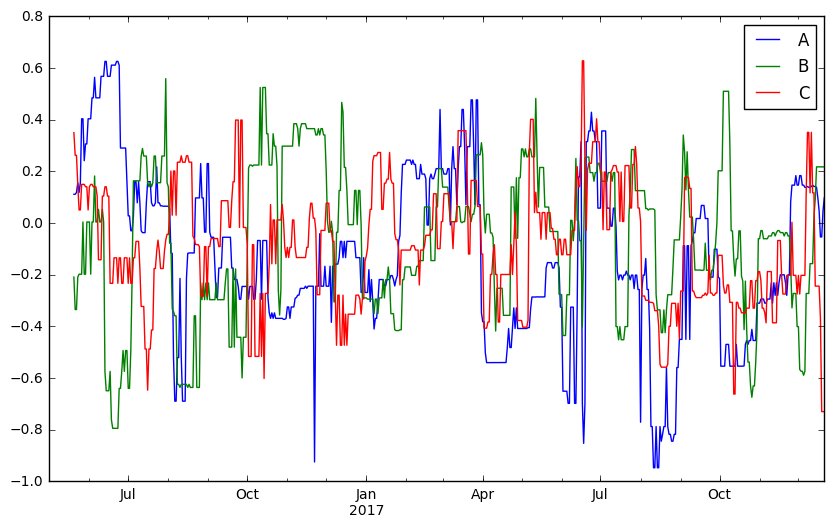

In [30]:
r.quantile(.5).plot()

In [35]:
r.agg(['sum','count']).tail()

A               B               C      
                 sum count       sum count       sum count
2017-12-17  2.018111  20.0  1.335452  20.0 -0.323231  20.0
2017-12-18  1.073635  20.0  1.560848  20.0 -2.586296  20.0
2017-12-19 -0.147357  20.0  3.279318  20.0 -4.278379  20.0
2017-12-20  1.805407  20.0  4.305832  20.0 -4.443035  20.0
2017-12-21  2.318629  20.0  6.038790  20.0 -4.288387  20.0

### What about a custom function?

In [43]:
# %load snippets/custom_rolling.py
df.rolling(window = 10, center=False).apply(lambda x: x[0]-x[-1]).head()

,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN


### What if I want to generate a rolling window function of monthly data from daily data?

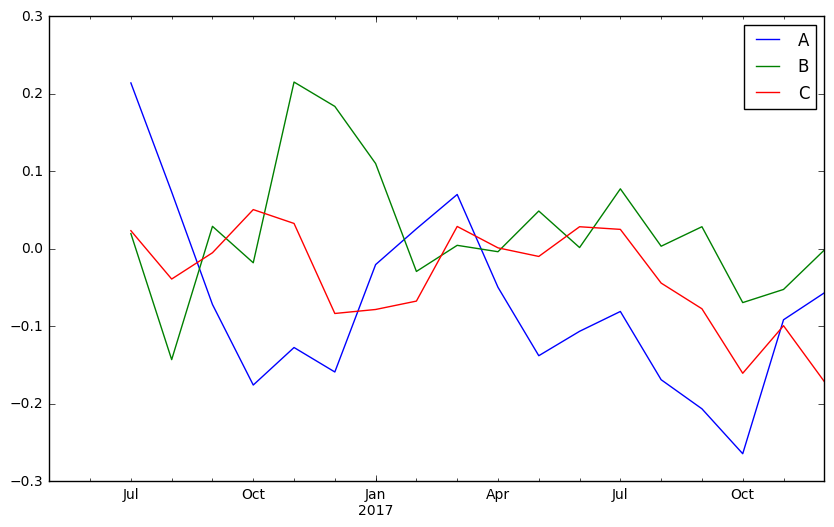

In [47]:
# %load snippets/resample_rolling.py
df.resample('M').mean().rolling(window = 3).mean().plot()

## Expanding windows

In [48]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-05-02,-0.587698,0.357518,0.244377
2016-05-03,-0.415678,0.126598,0.593031
2016-05-04,-0.222043,-0.085825,0.599787
2016-05-05,-0.358424,-0.081296,0.448464


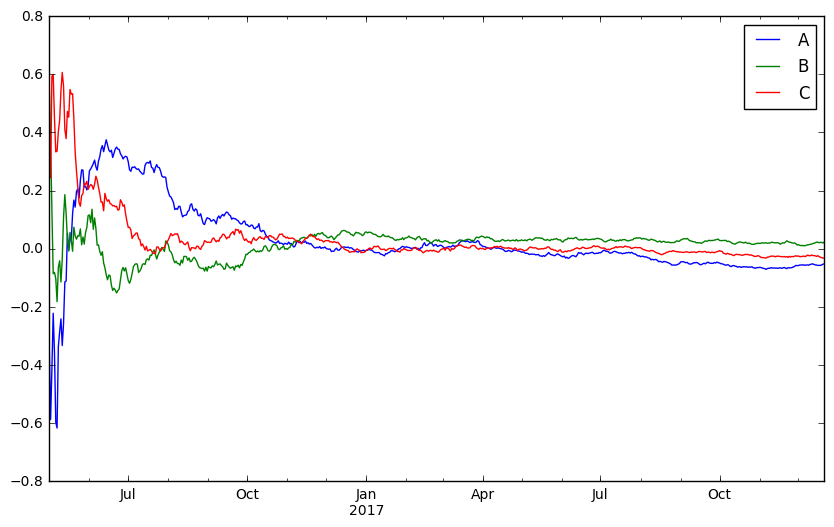

In [49]:
df.expanding(min_periods = 1).mean().plot()

# Try

(1) How can you perform an exponentially weight moving average rather than a window function? (hint: look for ewma + pandas docs)

(2) When would you use an expanding window vs. a rolling window?

(3) Write a custom function to repace .quantile(.5) function for a moving average

(4) How would you compute more than one aggregation function on a moving window function at the same time? 

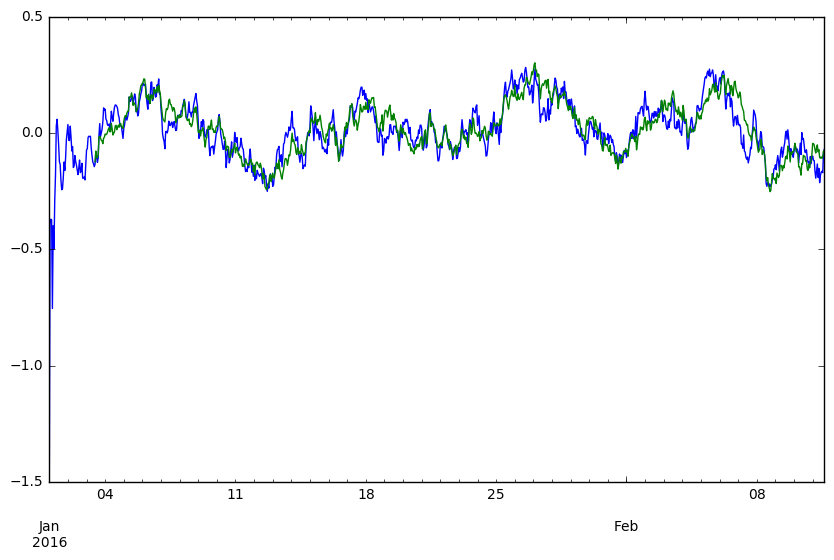

In [63]:
# %load snippets/window_funcs_try.py
#1
ts = pd.Series(np.random.randn(1000), index = pd.date_range(start='1/1/2016/', periods=1000, freq='H'))
ts.ewm(span=60).mean().plot()
ts.rolling(window=60).mean().plot()

(2) When old data are still relevant. Eg. diabetic patient data.

In [64]:
#3
r = df.rolling(20)
r.apply(lambda x: sorted(x)[round(len(x) * .5)]).head()

,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN


In [65]:
#4
df.rolling(20).agg(['sum','count']).head()

A         B         C      
           sum count sum count sum count
2016-05-01 NaN   1.0 NaN   1.0 NaN   1.0
2016-05-02 NaN   2.0 NaN   2.0 NaN   2.0
2016-05-03 NaN   3.0 NaN   3.0 NaN   3.0
2016-05-04 NaN   4.0 NaN   4.0 NaN   4.0
2016-05-05 NaN   5.0 NaN   5.0 NaN   5.0